In [ ]:
# Three Observations:
# Observation 1: Southern Hemisphere climates tend to be slightly milder than those 
# at similar latitudes in the Northern Hemisphere. This is because the Southern
# Hemisphere has significantly more ocean and much less land; water heats up and cools down more slowly than land.

# Observation 2: Highest temperature is found at 0 latitude and as the latidude increases or decreases, \
# temperature drops. This happens as equatorial region receives sunlight straight with less 
# or no angle due to curvature shape of earth.

# Observation 3: Latitude doesn't have a strong iinfluence on wind speed. The speed of the wind is controlled 
# by the strength of the air pressure gradient, the stronger the pressure gradient the higher the wind speed.

In [66]:
#Import all necessary Libraries
import pandas as pd
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from citipy import citipy
import numpy as np
import pandas as pd
# Weather API Key
from config import api_key
import scipy.stats as st

# Output File (CSV)
output_data_file = "cities.csv"

In [67]:
#Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
#WeatherPy
# In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a simple Python library, the OpenWeatherMap API,
# and a little common sense to create a representative model of weather across world cities.

#Step 1: Get range of longitude and latitude.
#Latitudes range from -90 to 90, and longitudes range from -180 to 180
#generate random list for latitudes and longitudes 

latitude = []
longitude = []

for each_lat in np.random.randint(-90,90,1500):
    latitude.append(each_lat)

for each_lon in np.random.randint(-180,180,1500):
    longitude.append(each_lon)

    
#Create and variable called latitude_and_Longitude and store all random latitudes and longitudes generated

latitude_and_Longitude = tuple(zip(latitude,longitude))


In [68]:
#use citipy library to find the nearest city for all latitudes and longitudes

cities = []
country = []

for lat,lon in latitude_and_Longitude:
    city = citipy.nearest_city(lat,lon)
  

    # Replace spaces with %20 to create url correctly 
    #city = city.replace(" ", "%20")
    cityName = city.city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:

        cities.append(cityName)
        
        country.append(city.country_code)

# Print the city count to confirm sufficient count
len(cities)
    
print('The above script has generated {} different cities using random numbers.'.format(len(set(cities))))

The above script has generated 594 different cities using random numbers.


In [69]:
#create a dataframe to store all the cities and countries generated with citipy

df_countries = pd.DataFrame({'Cities': cities,
              'Country': country})

#add additional blank columns to store information from openweathermap api

df_countries['Latitude'] = ''
df_countries['Longitude'] = ''
df_countries['Temperature (F)'] = ''
df_countries['Humidity (%)'] = ''
df_countries['Cloudiness (%)'] = ''
df_countries['Wind Speed (mph)'] = ''

#drop all duplicates in column Cities.

df_countries = df_countries.drop_duplicates(subset=['Cities'],keep='first')
df_countries

,Cities,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,punta arenas,cl,,,,,,
1,rikitea,pf,,,,,,
2,pokhara,np,,,,,,
3,lavrentiya,ru,,,,,,
4,kremenki,ru,,,,,,
...,...,...,...,...,...,...,...,...
1481,palasa,in,,,,,,
1483,arvika,se,,,,,,
1485,namatanai,pg,,,,,,
1491,rybinsk,ru,,,,,,


In [70]:
#loop through all rows and fill in values for blank columns in dataframe
#Perform API Calls
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it'sbeing processed (with the city number and city name).


for index,row in df_countries.iterrows():
    city_name = row['Cities']
    Country_id = row['Country']
    
    
    #api call for all Cities 
    api_url = "http://api.openweathermap.org/data/2.5/weather" \
    "?q={},{}&units=METRIC&mode=json&APPID={}".format(city_name,Country_id,api_key)
    
    print(api_url)
    
    country_info = requests.get(api_url).json()
    
    #print all api url's for each city
    #Processing Record 21 of Set 2 | isangel
    print("Processing Record", index, "City Name: ", city_name)
    
    
    try:
        df_countries.set_value(index,'Latitude',country_info['coord']['lat'])
        df_countries.set_value(index,'Longitude',country_info['coord']['lon'])
        df_countries.set_value(index,'Temperature (F)',country_info['main']['temp_max'])
        df_countries.set_value(index,'Humidity (%)',country_info['main']['humidity'])
        df_countries.set_value(index,'Cloudiness (%)',country_info['clouds']['all'])
        df_countries.set_value(index,'Wind Speed (mph)',country_info['wind']['speed'])
        
    except KeyError:
        df_countries.set_value(index,'Latitude',np.nan)
        df_countries.set_value(index,'Longitude',np.nan)
        df_countries.set_value(index,'Temperature (F)',np.nan)
        df_countries.set_value(index,'Humidity (%)',np.nan)
        df_countries.set_value(index,'Cloudiness (%)',np.nan)
        df_countries.set_value(index,'Wind Speed (mph)',np.nan)
        
        print('Missing weather information...skip')
    
  #  if index == 5:
  #      break

http://api.openweathermap.org/data/2.5/weather?q=punta arenas,cl&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 0 City Name:  punta arenas
http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2


/Users/ashwinpatel/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/ashwinpatel/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/ashwinpatel/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/ashwinpatel/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:29: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/ashwinpatel/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_l

Processing Record 1 City Name:  rikitea
http://api.openweathermap.org/data/2.5/weather?q=pokhara,np&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 2 City Name:  pokhara
http://api.openweathermap.org/data/2.5/weather?q=lavrentiya,ru&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 3 City Name:  lavrentiya
http://api.openweathermap.org/data/2.5/weather?q=kremenki,ru&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 4 City Name:  kremenki
http://api.openweathermap.org/data/2.5/weather?q=albany,au&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 5 City Name:  albany
http://api.openweathermap.org/data/2.5/weather?q=klaksvik,fo&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 6 City Name:  klaksvik
http://api.openweathermap.org/data/2.5/weather?q=hami,cn&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 8 Cit

/Users/ashwinpatel/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:34: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/ashwinpatel/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:35: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/ashwinpatel/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:36: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/ashwinpatel/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:37: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/ashwinpatel/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_l

Processing Record 37 City Name:  visnes
http://api.openweathermap.org/data/2.5/weather?q=nikolskoye,ru&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 39 City Name:  nikolskoye
http://api.openweathermap.org/data/2.5/weather?q=bengkulu,id&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 40 City Name:  bengkulu
http://api.openweathermap.org/data/2.5/weather?q=tazovskiy,ru&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 41 City Name:  tazovskiy
http://api.openweathermap.org/data/2.5/weather?q=maues,br&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 43 City Name:  maues
http://api.openweathermap.org/data/2.5/weather?q=arraial do cabo,br&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 44 City Name:  arraial do cabo
http://api.openweathermap.org/data/2.5/weather?q=lebedinyy,ru&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258

Processing Record 112 City Name:  jiuquan
http://api.openweathermap.org/data/2.5/weather?q=busselton,au&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 113 City Name:  busselton
http://api.openweathermap.org/data/2.5/weather?q=puerto ayora,ec&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 114 City Name:  puerto ayora
http://api.openweathermap.org/data/2.5/weather?q=marcona,pe&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 115 City Name:  marcona
Missing weather information...skip
http://api.openweathermap.org/data/2.5/weather?q=arman,ru&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 116 City Name:  arman
http://api.openweathermap.org/data/2.5/weather?q=thompson,ca&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 117 City Name:  thompson
http://api.openweathermap.org/data/2.5/weather?q=cabo san lucas,mx&units=METRIC&mode=json&A

Processing Record 185 City Name:  rocha
http://api.openweathermap.org/data/2.5/weather?q=guanica,us&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 186 City Name:  guanica
Missing weather information...skip
http://api.openweathermap.org/data/2.5/weather?q=mataura,pf&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 191 City Name:  mataura
Missing weather information...skip
http://api.openweathermap.org/data/2.5/weather?q=kultuk,ru&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 192 City Name:  kultuk
http://api.openweathermap.org/data/2.5/weather?q=barrow,us&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 193 City Name:  barrow
http://api.openweathermap.org/data/2.5/weather?q=pisco,pe&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 194 City Name:  pisco
http://api.openweathermap.org/data/2.5/weather?q=curaca,br&units=METRIC&mode=j

Processing Record 297 City Name:  miracema do tocantins
http://api.openweathermap.org/data/2.5/weather?q=kapaa,us&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 300 City Name:  kapaa
http://api.openweathermap.org/data/2.5/weather?q=amahai,id&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 301 City Name:  amahai
http://api.openweathermap.org/data/2.5/weather?q=prince george,ca&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 302 City Name:  prince george
http://api.openweathermap.org/data/2.5/weather?q=minab,ir&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 303 City Name:  minab
http://api.openweathermap.org/data/2.5/weather?q=kautokeino,no&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 304 City Name:  kautokeino
http://api.openweathermap.org/data/2.5/weather?q=iskateley,ru&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963dd

Processing Record 404 City Name:  nalut
http://api.openweathermap.org/data/2.5/weather?q=santa cruz,cr&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 406 City Name:  santa cruz
http://api.openweathermap.org/data/2.5/weather?q=susanville,us&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 408 City Name:  susanville
http://api.openweathermap.org/data/2.5/weather?q=manokwari,id&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 409 City Name:  manokwari
http://api.openweathermap.org/data/2.5/weather?q=mandera,ke&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 410 City Name:  mandera
http://api.openweathermap.org/data/2.5/weather?q=geraldton,au&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 412 City Name:  geraldton
http://api.openweathermap.org/data/2.5/weather?q=marienburg,sr&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc62

Processing Record 515 City Name:  zyryanskoye
http://api.openweathermap.org/data/2.5/weather?q=zubtsov,ru&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 518 City Name:  zubtsov
http://api.openweathermap.org/data/2.5/weather?q=hofn,is&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 520 City Name:  hofn
http://api.openweathermap.org/data/2.5/weather?q=namtsy,ru&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 521 City Name:  namtsy
http://api.openweathermap.org/data/2.5/weather?q=lorengau,pg&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 522 City Name:  lorengau
http://api.openweathermap.org/data/2.5/weather?q=salym,ru&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 526 City Name:  salym
http://api.openweathermap.org/data/2.5/weather?q=anahuac,mx&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 532 

Processing Record 661 City Name:  brownsville
http://api.openweathermap.org/data/2.5/weather?q=riyadh,sa&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 662 City Name:  riyadh
http://api.openweathermap.org/data/2.5/weather?q=quincy,us&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 666 City Name:  quincy
http://api.openweathermap.org/data/2.5/weather?q=taoudenni,ml&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 668 City Name:  taoudenni
http://api.openweathermap.org/data/2.5/weather?q=kashi,cn&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 671 City Name:  kashi
http://api.openweathermap.org/data/2.5/weather?q=fairbanks,us&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 672 City Name:  fairbanks
http://api.openweathermap.org/data/2.5/weather?q=hay river,ca&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing

Processing Record 806 City Name:  sarakhs
http://api.openweathermap.org/data/2.5/weather?q=beringovskiy,ru&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 814 City Name:  beringovskiy
http://api.openweathermap.org/data/2.5/weather?q=lodja,cd&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 815 City Name:  lodja
http://api.openweathermap.org/data/2.5/weather?q=sao felix do xingu,br&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 816 City Name:  sao felix do xingu
http://api.openweathermap.org/data/2.5/weather?q=half moon bay,us&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 817 City Name:  half moon bay
http://api.openweathermap.org/data/2.5/weather?q=avera,pf&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 819 City Name:  avera
Missing weather information...skip
http://api.openweathermap.org/data/2.5/weather?q=upernavik,gl&units

Processing Record 947 City Name:  jiexiu
http://api.openweathermap.org/data/2.5/weather?q=nehe,cn&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 952 City Name:  nehe
http://api.openweathermap.org/data/2.5/weather?q=mlalo,tz&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 959 City Name:  mlalo
http://api.openweathermap.org/data/2.5/weather?q=palabuhanratu,id&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 963 City Name:  palabuhanratu
Missing weather information...skip
http://api.openweathermap.org/data/2.5/weather?q=escanaba,us&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 966 City Name:  escanaba
http://api.openweathermap.org/data/2.5/weather?q=inderborskiy,kz&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 968 City Name:  inderborskiy
Missing weather information...skip
http://api.openweathermap.org/data/2.5/weather?q=praia,

Processing Record 1075 City Name:  djambala
http://api.openweathermap.org/data/2.5/weather?q=longhua,cn&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 1079 City Name:  longhua
http://api.openweathermap.org/data/2.5/weather?q=husavik,is&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 1085 City Name:  husavik
http://api.openweathermap.org/data/2.5/weather?q=brainerd,us&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 1093 City Name:  brainerd
http://api.openweathermap.org/data/2.5/weather?q=marsa matruh,eg&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 1097 City Name:  marsa matruh
http://api.openweathermap.org/data/2.5/weather?q=luwuk,id&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 1100 City Name:  luwuk
http://api.openweathermap.org/data/2.5/weather?q=fukue,jp&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Pro

Processing Record 1248 City Name:  korla
http://api.openweathermap.org/data/2.5/weather?q=zaysan,kz&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 1257 City Name:  zaysan
http://api.openweathermap.org/data/2.5/weather?q=les cayes,ht&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 1259 City Name:  les cayes
http://api.openweathermap.org/data/2.5/weather?q=kamaishi,jp&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 1261 City Name:  kamaishi
http://api.openweathermap.org/data/2.5/weather?q=seydisehir,tr&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 1268 City Name:  seydisehir
http://api.openweathermap.org/data/2.5/weather?q=sheopur,in&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 1269 City Name:  sheopur
http://api.openweathermap.org/data/2.5/weather?q=fernandez,mx&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2


Processing Record 1441 City Name:  ranghulu
http://api.openweathermap.org/data/2.5/weather?q=kumeny,ru&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 1444 City Name:  kumeny
http://api.openweathermap.org/data/2.5/weather?q=mergui,mm&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 1451 City Name:  mergui
Missing weather information...skip
http://api.openweathermap.org/data/2.5/weather?q=haflong,in&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 1452 City Name:  haflong
http://api.openweathermap.org/data/2.5/weather?q=tello,co&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 1457 City Name:  tello
http://api.openweathermap.org/data/2.5/weather?q=fairhope,us&units=METRIC&mode=json&APPID=c02f0b50c6c1b02520b9963ddc6258d2
Processing Record 1464 City Name:  fairhope
http://api.openweathermap.org/data/2.5/weather?q=copiapo,cl&units=METRIC&mode=json&APPID=c02f0b50c6c1b

In [71]:
#change all data recieved from openweathermap api to numerical data
df_countries['Latitude'] = pd.to_numeric(df_countries['Latitude'])
df_countries['Longitude'] = pd.to_numeric(df_countries['Longitude'])
df_countries['Temperature (F)'] = pd.to_numeric(df_countries['Temperature (F)'])
df_countries['Humidity (%)'] = pd.to_numeric(df_countries['Humidity (%)'])
df_countries['Cloudiness (%)'] = pd.to_numeric(df_countries['Cloudiness (%)'])
df_countries['Wind Speed (mph)'] = pd.to_numeric(df_countries['Wind Speed (mph)'])

In [72]:
#display dataframe df_countries after openweathermap api calls 
#df_countries.head(100)
print(df_countries)

            Cities Country  Latitude  Longitude  Temperature (F)  \
0     punta arenas      cl    -53.15     -70.92             9.00   
1          rikitea      pf    -23.12    -134.97            25.88   
2          pokhara      np     28.23      83.98            11.30   
3       lavrentiya      ru     65.58    -171.00           -26.59   
4         kremenki      ru     54.88      37.13             3.00   
...            ...     ...       ...        ...              ...   
1481        palasa      in     18.77      84.42            22.36   
1483        arvika      se     59.66      12.59             2.78   
1485     namatanai      pg     -3.67     152.43            29.87   
1491       rybinsk      ru     58.04      38.84            -2.11   
1496       jackson      us     42.42    -122.83             9.44   

      Humidity (%)  Cloudiness (%)  Wind Speed (mph)  
0             81.0            75.0              2.60  
1             76.0            43.0              6.00  
2             65.0

In [73]:
print(df_countries)

            Cities Country  Latitude  Longitude  Temperature (F)  \
0     punta arenas      cl    -53.15     -70.92             9.00   
1          rikitea      pf    -23.12    -134.97            25.88   
2          pokhara      np     28.23      83.98            11.30   
3       lavrentiya      ru     65.58    -171.00           -26.59   
4         kremenki      ru     54.88      37.13             3.00   
...            ...     ...       ...        ...              ...   
1481        palasa      in     18.77      84.42            22.36   
1483        arvika      se     59.66      12.59             2.78   
1485     namatanai      pg     -3.67     152.43            29.87   
1491       rybinsk      ru     58.04      38.84            -2.11   
1496       jackson      us     42.42    -122.83             9.44   

      Humidity (%)  Cloudiness (%)  Wind Speed (mph)  
0             81.0            75.0              2.60  
1             76.0            43.0              6.00  
2             65.0

In [74]:
#Convert Raw Data to DataFrame
#Export the city data into a .csv.
df_countries.to_csv(output_data_file,index=False)  #THIS WILL BE IN DIRECTORY
#Display the DataFrame
df_countries.head()

,Cities,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,punta arenas,cl,-53.15,-70.92,9.00,81.0,75.0,2.60
1,rikitea,pf,-23.12,-134.97,25.88,76.0,43.0,6.00
2,pokhara,np,28.23,83.98,11.30,65.0,0.0,0.60
3,lavrentiya,ru,65.58,-171.00,-26.59,80.0,0.0,1.39
4,kremenki,ru,54.88,37.13,3.00,93.0,73.0,5.00


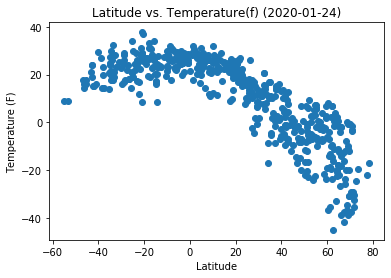

In [75]:
#Latitude vs. Temperature Plot
plt.scatter(df_countries['Latitude'], df_countries['Temperature (F)'])

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Latitude vs. Temperature(f) (2020-01-24)')
plt.savefig("CityLatitudeVsTemperature.png")
#Notes and Observations
#Code is analyzing the relationship between temperature and latitude. In this case the 
#lower the latitude the higher the temps and the higher the latitude the lower the temps.
#Lower latitudes must be southern hemispher and #Higher the latitudes must be northern hemisphere

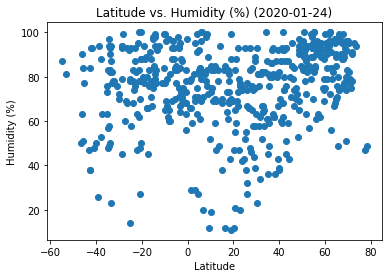

In [76]:
#Latitude vs. Humidity Plot
plt.scatter(df_countries['Latitude'], df_countries['Humidity (%)'])

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity (%) (2020-01-24)')
plt.savefig("CityLatitudeVsHumidity.png")

#Code is analyzing the relationship between temperature and humidity. In this case the 
#chart does not tell us very much - at any latitude humidity can exist

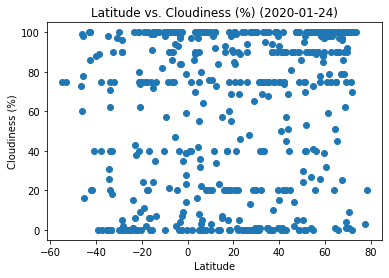

In [77]:
#Latitude vs. Cloudiness Plot

plt.scatter(df_countries['Latitude'], df_countries['Cloudiness (%)'])

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs. Cloudiness (%) (2020-01-24)')
plt.savefig("CityLatitudeVsCloudiness.png")

#Code is analyzing the relationship between temperature and cloudiness. In this case the 
#chart does not tell us very much - at any latitude cloudiness can vary

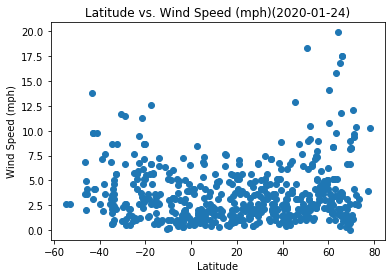

In [78]:
#Latitude vs. Wind Speed Plot
plt.scatter(df_countries['Latitude'], df_countries['Wind Speed (mph)'])

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude vs. Wind Speed (mph)(2020-01-24)')
plt.savefig("CityLatitudeVsWindSpeed.png")

#Code is analyzing the relationship between temperature and windspeed. In this case the 
#chart does not tell us very much - at any latitude windspeed usually stays below 10mph


In [79]:
# OPTIONAL: Create a function to create Linear Regression plots

def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

In [80]:
#Northern Hemisphere - Temp vs. Latitude Linear Regression
#Your next objective is to run linear regression on each relationship, 
#only this time separating them into Northern Hemisphere 
#greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

df_countries_North = df_countries[df_countries["Latitude"] >= 0]
df_countries_South = df_countries[df_countries["Latitude"] < 0]


The r-squared is : -0.85


(array([-50., -40., -30., -20., -10.,   0.,  10.,  20.,  30.,  40.]),
 <a list of 10 Text yticklabel objects>)

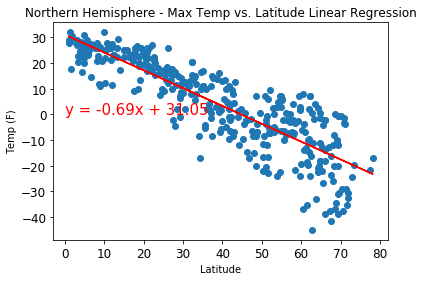

In [81]:
# Call an function #1
equation = linear_agression(df_countries_North["Latitude"], df_countries_North["Temperature (F)"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Temp (F)")

# Save the figure
plt.savefig("Northern Hemisphere - Temp vs. Latitude Linear Regression.png")

plt.xticks(size=12)
plt.yticks(size=12)

# The correlation coefficient is a statistical measure that calculates the strength of the relationship 
# between the relative movements of two variables. The values range between -1.0 and 1.0. 
# A calculated number greater than 1.0 or less than -1.0 means that there was an error in 
# the correlation measurement. A correlation of -1.0 shows a perfect negative correlation, while a 
# correlation of 1.0 shows a perfect positive correlation. A correlation of 0.0 shows no relationship between
# the movement of the two variables.


The r-squared is : 0.46


(array([ 5., 10., 15., 20., 25., 30., 35., 40.]),
 <a list of 8 Text yticklabel objects>)

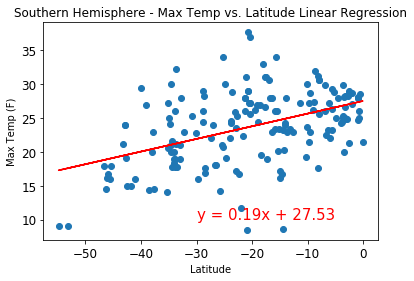

In [98]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
# Call an function #1
equation = linear_agression(df_countries_South["Latitude"],df_countries_South["Temperature (F)"])

# Call an function #2
annotate(equation, -30, 10)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

plt.xticks(size=12)
plt.yticks(size=12)

The r-squared is : 0.34


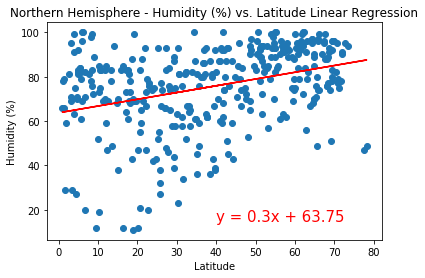

In [84]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
# Call an function #1
equation = linear_agression(df_countries_North["Latitude"], df_countries_North["Humidity (%)"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

The r-squared is : 0.2


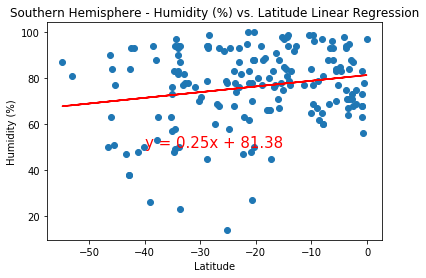

In [85]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

# Call an function #1
equation = linear_agression(df_countries_South["Latitude"], df_countries_South["Humidity (%)"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

The r-squared is : 0.25


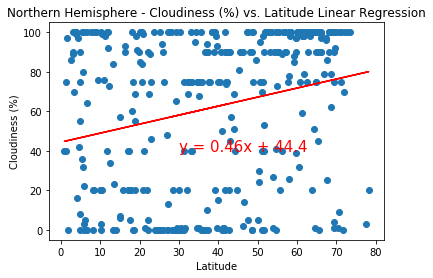

In [90]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

equation = linear_agression(df_countries_North["Latitude"], df_countries_North["Cloudiness (%)"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")


The r-squared is : 0.17


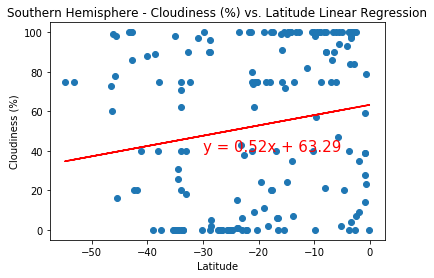

In [89]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression


# Call an function #1
equation = linear_agression(df_countries_South["Latitude"], df_countries_South["Cloudiness (%)"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

The r-squared is : 0.26


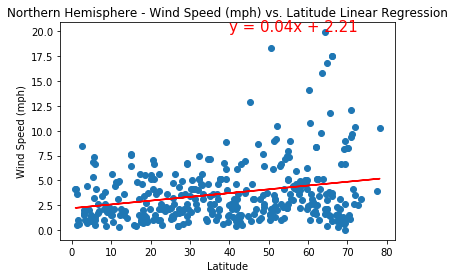

In [92]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
# Call an function #1
equation = linear_agression(df_countries_North["Latitude"], df_countries_North["Wind Speed (mph)"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

The r-squared is : -0.28


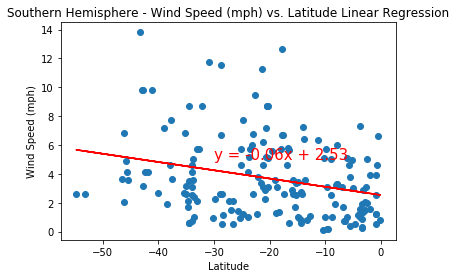

In [97]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
# Call an function #1
equation = linear_agression(df_countries_South["Latitude"], df_countries_South["Wind Speed (mph)"])

# Call an function #2
annotate(equation, -30, 5)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")